In [27]:
# Create an “Academic performance” dataset of students and perform the following operations using Python.
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
# 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
# Reason and document your approach properly.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from  sklearn.preprocessing import RobustScaler

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/GaneshPatil1806/PICT_SEM6/main/DSBDA/StudentsPerformance_modified.csv")

In [30]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [31]:
df.ffill()
df.bfill()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [32]:
df['math score'] = df['math score'].replace('?', np.nan)
df['math score'] = df['math score'].astype(float)
df['math score'].fillna(df['math score'].mean(), inplace=True)

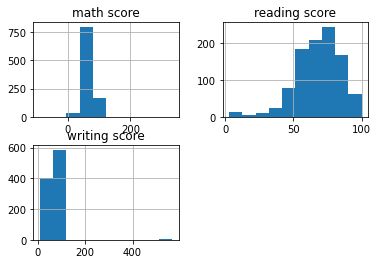

In [33]:
df.hist()
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

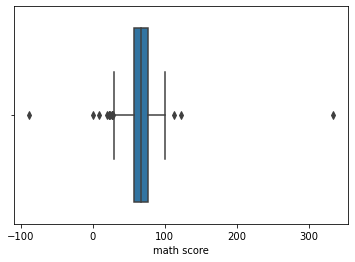

In [34]:
sns.boxplot(df['math score'])

In [38]:
z = np.abs(stats.zscore(df['math score']))
arr = np.where(z>3)
arr

(array([ 59, 431, 456, 474, 980], dtype=int64),)

In [40]:
df.shape

(1000, 8)

In [41]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['math score'] > lower) & (df['math score'] < upper)]
df.shape

(986, 8)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

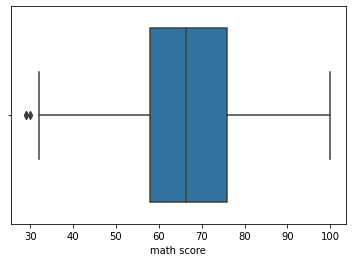

In [42]:
sns.boxplot(df['math score'])

<AxesSubplot:xlabel='math score', ylabel='Count'>

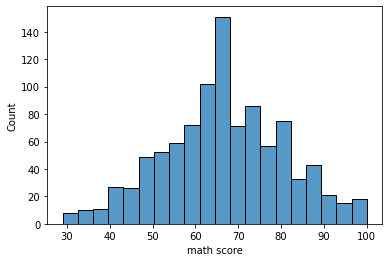

In [50]:
sns.histplot(df['math score'])

In [60]:
numeric_data = df.select_dtypes(include=['float64','int64'])
scaler  = RobustScaler()
scaled_data = scaler.fit_transform(numeric_data)

-0.04326183421104021

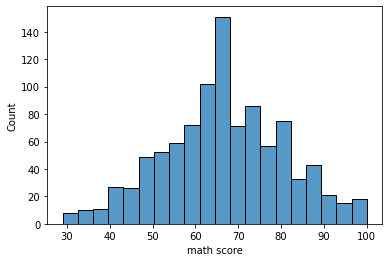

In [61]:
# Data Transformation
sns.histplot(df['math score'])
df['math score'].skew()

<AxesSubplot:xlabel='writing score', ylabel='Count'>

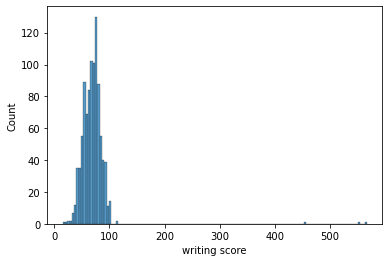

In [46]:
df['writing score'].skew() 
sns.histplot(df['writing score'])

<ipython-input-54-cc2729ea1edd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'] = np.sqrt(df['writing score'])


<AxesSubplot:xlabel='writing score', ylabel='Count'>

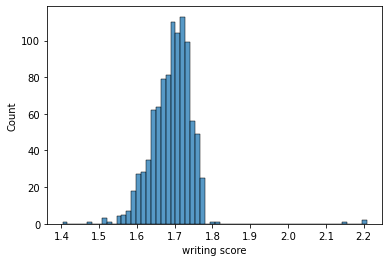

In [54]:
df['writing score']
df['writing score'] = np.sqrt(df['writing score'])
sns.histplot(df['writing score'])

In [56]:
df['writing score'].skew() 

1.4856012505742064